In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
# Files to load
city_data_to_load = "C:/Users/esobieski/Documents/Berkeley/PyBer_Analysis/Resources/city_data.csv"
ride_data_to_load = "C:/Users/esobieski/Documents/Berkeley/PyBer_Analysis/Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)

In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)

In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="outer", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,Lake Jonathanshire,4/7/2019 20:51,31.25,4.441250e+12,5,Urban
2,Lake Jonathanshire,3/9/2019 23:45,19.89,2.389500e+12,5,Urban
3,Lake Jonathanshire,4/7/2019 18:09,24.28,7.796810e+12,5,Urban
4,Lake Jonathanshire,1/2/2019 14:14,13.89,4.242550e+11,5,Urban


In [6]:
# Get the total number of rides for urban, suburban and rural city types.
total_ride_count = pyber_data_df.groupby(["type"]).count()
total_ride_count

,city,date,fare,ride_id,driver_count
type,,,,,
Rural,125,125,125,125,125
Suburban,625,625,625,625,625
Urban,1625,1625,1625,1625,1625


In [7]:
# Get the total number of drivers for urban, suburban and rural city types.
driver_total = city_data_df.groupby(["type"]).sum()
driver_total

,driver_count
type,
Rural,78
Suburban,490
Urban,2405


In [8]:
# Get the total number of fares for urban, suburban and rural city types.
fare_total = pyber_data_df.groupby(["type"]).sum()
fare_total

,fare,ride_id,driver_count
type,,,
Rural,4327.93,5.809682e+14,537
Suburban,19356.33,3.106884e+15,8570
Urban,39854.38,7.919413e+15,59602


In [9]:
# Get Average fare per ride for urban, suburban and rural city types.
X = fare_total['fare'].values.tolist()
Y = total_ride_count['city'].values.tolist()
avg_fare_per_ride = []

for i in range(len(X)):
    ans = float(X[i])/Y[i]
    avg_fare_per_ride.append(ans)
avg_fare_per_ride

[34.62344, 30.970127999999992, 24.525772307692307]

In [10]:
# Get Average fare per driver for urban, suburban and rural city types.
X = fare_total['fare'].values.tolist()
Y = driver_total['driver_count'].values.tolist()
avg_fare_per_driver = []

for i in range(len(X)):
    ans = float(X[i])/Y[i]
    avg_fare_per_driver.append(ans)

avg_fare_per_driver

[55.48628205128205, 39.502714285714276, 16.571467775467774]

In [11]:
#create PyBer_Summary Dataframe, with formatting
PyBer_summary6_df=pd.DataFrame({'type': driver_total.index.tolist(), 
                               'Total Rides': total_ride_count['city'].values.tolist(),
                               'Total Drivers': driver_total['driver_count'].values.tolist(),
                               'Total Fares': fare_total['fare'].values.tolist(),
                               'Avg Fare per Ride': avg_fare_per_ride,
                               'Avg Fare per Driver': avg_fare_per_driver
                               })
Final_PyBer_summary_df = PyBer_summary6_df.set_index('type')
Final_PyBer_summary_df

,Total Rides,Total Drivers,Total Fares,Avg Fare per Ride,Avg Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
# Format the PyBer Summary to have the comma for a thousands separator, dollars and two decimals.
Final_PyBer_summary_df["Total Rides"] = Final_PyBer_summary_df["Total Rides"].map("{:,}".format)
Final_PyBer_summary_df["Total Drivers"] = Final_PyBer_summary_df["Total Drivers"].map("{:,}".format)
Final_PyBer_summary_df["Total Fares"] = Final_PyBer_summary_df["Total Fares"].map("${:,.2f}".format)
Final_PyBer_summary_df["Avg Fare per Ride"] = Final_PyBer_summary_df["Avg Fare per Ride"].map("${:,.2f}".format)
Final_PyBer_summary_df["Avg Fare per Driver"] = Final_PyBer_summary_df["Avg Fare per Driver"].map("${:,.2f}".format)
Final_PyBer_summary_df

,Total Rides,Total Drivers,Total Fares,Avg Fare per Ride,Avg Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


# PART TWO OF CHALLENGE

In [13]:
# 1. Create a new dataframe and rename columns in pyber_data_df
p2_PyBer_data_df= pyber_data_df.copy()
p2_PyBer_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,Lake Jonathanshire,4/7/2019 20:51,31.25,4.441250e+12,5,Urban
2,Lake Jonathanshire,3/9/2019 23:45,19.89,2.389500e+12,5,Urban
3,Lake Jonathanshire,4/7/2019 18:09,24.28,7.796810e+12,5,Urban
4,Lake Jonathanshire,1/2/2019 14:14,13.89,4.242550e+11,5,Urban


In [14]:
#Rename columns
p2_PyBer_data_df.rename(columns={'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}, inplace=True)
p2_PyBer_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,Lake Jonathanshire,4/7/2019 20:51,31.25,4.441250e+12,5,Urban
2,Lake Jonathanshire,3/9/2019 23:45,19.89,2.389500e+12,5,Urban
3,Lake Jonathanshire,4/7/2019 18:09,24.28,7.796810e+12,5,Urban
4,Lake Jonathanshire,1/2/2019 14:14,13.89,4.242550e+11,5,Urban


In [15]:
# 2. Set index to the Date column using reset_index()
p2_PyBer_data_df.set_index('Date',inplace=True)
p2_PyBer_data_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
1/14/2019 10:14,Lake Jonathanshire,13.83,5.739410e+12,5,Urban
4/7/2019 20:51,Lake Jonathanshire,31.25,4.441250e+12,5,Urban
3/9/2019 23:45,Lake Jonathanshire,19.89,2.389500e+12,5,Urban
4/7/2019 18:09,Lake Jonathanshire,24.28,7.796810e+12,5,Urban
1/2/2019 14:14,Lake Jonathanshire,13.89,4.242550e+11,5,Urban
...,...,...,...,...,...
4/18/2019 19:33,West Heather,46.60,3.671000e+12,4,Rural
3/2/2019 21:04,West Heather,20.99,5.766450e+12,4,Rural
3/6/2019 20:06,West Heather,48.11,2.570550e+12,4,Rural


In [16]:
# 3. Create new dataframe for fares and include only the Date, City Type, and Fare Columns, grouping by city type, and drop extra date column
fares_summary_df=pd.DataFrame({'Date': p2_PyBer_data_df.index.values.tolist(),
                                'City Type': p2_PyBer_data_df['City Type'],
                                'Total Fare': p2_PyBer_data_df['Fare']})
fares_summary_df.set_index('Date', inplace=True)
fares_summary_df.head()

,City Type,Total Fare
Date,,
1/14/2019 10:14,Urban,13.83
4/7/2019 20:51,Urban,31.25
3/9/2019 23:45,Urban,19.89
4/7/2019 18:09,Urban,24.28
1/2/2019 14:14,Urban,13.89


In [17]:
# 5. Set the index to the datetime data type, Converting the index as date
fares_summary_df.index = pd.to_datetime(fares_summary_df.index)
fares_summary_df.head()

,City Type,Total Fare
Date,,
2019-01-14 10:14:00,Urban,13.83
2019-04-07 20:51:00,Urban,31.25
2019-03-09 23:45:00,Urban,19.89
2019-04-07 18:09:00,Urban,24.28
2019-01-02 14:14:00,Urban,13.89


In [18]:
# 6. Check the Dataframe using info() method to make sure the index is a datetime data type
fares_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:00 to 2019-05-07 19:22:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City Type   2375 non-null   object 
 1   Total Fare  2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [19]:
# 7. Calculate the sum() of fares by date and city type
total_fares_by_date_df = fares_summary_df.groupby(pd.Grouper(freq="W")).sum()
total_fares_by_date_df.head()

,Total Fare
Date,
2019-01-06,2571.20
2019-01-13,3223.21
2019-01-20,3463.22
2019-01-27,3512.48
2019-02-03,3462.81


In [20]:
# 7. Calculate the sum() of fares by Type of City
table = pd.pivot_table(fares_summary_df,  values='Total Fare', index=['Date'], columns=['City Type'] , aggfunc=np.sum)
table.groupby(pd.Grouper(freq="D")).sum()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,0.00,101.36,506.89
...,...,...,...
2019-05-04,0.00,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [21]:
# 9. Create a pivot table DataFrame with the Date as the index and Columns="City Type" with the Fare for each Date in each row.  
# Note: there will be NaNs in some rows, which will be taken care of when you sum based on Date.

table = pd.pivot_table(fares_summary_df,  values='Total Fare', index=['Date'], columns=['City Type'] , aggfunc=np.sum)
table.groupby(pd.Grouper(freq="D")).sum()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,0.00,101.36,506.89
...,...,...,...
2019-05-04,0.00,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [22]:
# 10. Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28' using loc
Pivot_New_df=table.loc['2019-01-01':'2019-04-28']
Pivot_New_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75


In [23]:
# 11. Create a new Dataframe by setting the Dataframe you created in Step 11 with resample() in weekly bins, 
# and calculate the sum of the fares each week
New_df= Pivot_New_df.resample('W', label='right', loffset=pd.DateOffset(days=1)).sum()
New_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-07,187.92,721.60,1661.68
2019-01-14,67.65,1105.13,2050.43
2019-01-21,306.00,1218.20,1939.02
2019-01-28,179.69,1203.28,2129.51
2019-02-04,333.08,1042.79,2086.94


In [24]:
# 8. Reset index to put date in a column
Really_New_df=New_df.reset_index()
Really_New_df.head()

City Type,Date,Rural,Suburban,Urban
0,2019-01-07,187.92,721.60,1661.68
1,2019-01-14,67.65,1105.13,2050.43
2,2019-01-21,306.00,1218.20,1939.02
3,2019-01-28,179.69,1203.28,2129.51
4,2019-02-04,333.08,1042.79,2086.94


# PLOT FINAL GRAPH

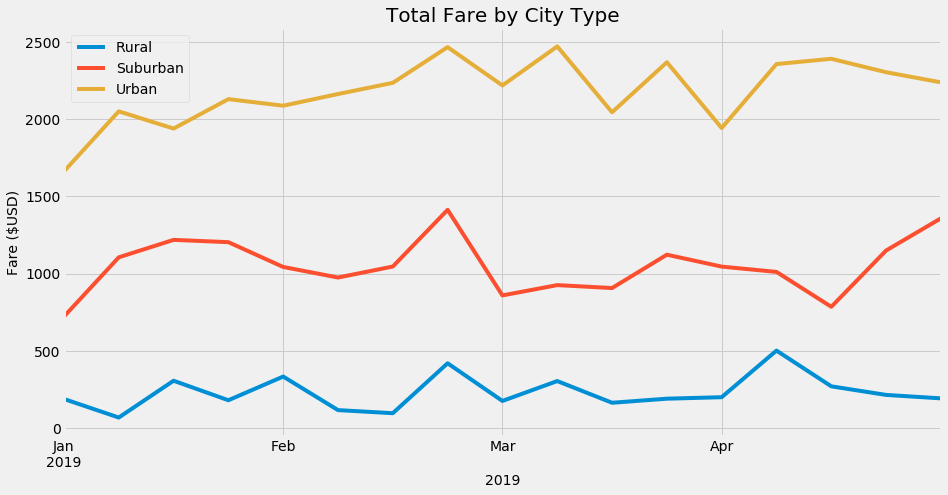

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
# Use the graph style fivethirtyeight
plt.style.use('fivethirtyeight')
# gca stands for 'get current axis'
ax = plt.gca()

Really_New_df.plot(kind='line',x='Date',y='Rural',figsize=[14,7],ax=ax)
Really_New_df.plot(kind='line',x='Date',y='Suburban',figsize=[14,7],ax=ax)
Really_New_df.plot(kind='line',x='Date',y='Urban',figsize=[14,7],ax=ax)

# Add the title, y-axis label and y.
ax.set_title('Total Fare by City Type', fontsize=20)
ax.set_xlabel('2019',fontsize=14)
ax.set_ylabel('Fare ($USD)', fontsize=14)
#ax.set_yticks(np.arange(0, 2500, step=500))
#ax.set_xticks(np.arange (4),("Jan","Feb","Mar","April"))
# Add the legend.
ax.legend()
# Save the figure to the "analysis" folder
plt.savefig("C:/Users/esobieski/Documents/Berkeley/PyBer_Analysis/Analysis/Fig10.png")

plt.show()